In [134]:
import numpy as np
import pandas as pd
import plotly
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [135]:
exam_1 = np.random.uniform(0,5,size=(100))
exam_2 = np.random.uniform(0,5,size=(100))
X = np.array(list(zip(exam_1, exam_2)))
y = [max(min(5.0,i),0.0) for i in exam_1 * 0.6 + exam_2 * 0.4 + (0.5-np.random.uniform(0,1))]

In [136]:
train_X, text_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [137]:
model = LinearRegression()
model.fit(train_X,train_y )
train_y_pred = model.predict(train_X)

In [138]:
model.coef_

array([0.59735667, 0.39827515])

In [139]:
x, y = np.mgrid[0:6, 0:6]
z = np.apply_along_axis(lambda x:model.predict([x]),0,np.stack((x,y)))[0]

In [140]:
layout = go.Layout(
        title='Funcion de Regresion',
        autosize=False,
        width=1000,
        height=1000,
        showlegend = True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
     xaxis_title="Examen1",
     yaxis_title="Examen2"
)

fig = go.Figure()
fig.add_trace(
    go.Surface(z=z, x=x, y=y, name='Funcion F(x)')
)
fig.add_trace(
    go.Scatter3d(
        x=train_X[:,0],
        y=train_X[:,1],
        z=train_y,
        mode ='markers',
        marker=dict(
        size=10,
        color=train_y
    ),
    name='Data')
)
fig.update_layout(
    layout
)
fig['data'][0]['showlegend']=True
fig['data'][1]['showlegend']=True
fig.show()

In [143]:
df = pd.DataFrame()
df["nota_final"] = train_y
df["examen_1"] = train_X[:,0]
df["examen_2"] = train_X[:,1]
model_sm = smf.ols(formula='nota_final ~ examen_1 + examen_2',
                data=df).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             nota_final   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.203e+05
Date:                Tue, 30 Aug 2022   Prob (F-statistic):          2.79e-135
Time:                        22:21:48   Log-Likelihood:                 200.60
No. Observations:                  80   AIC:                            -395.2
Df Residuals:                      77   BIC:                            -388.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3301      0.006    -59.205      0.000      -0.341      -0.319
examen_1       0.5974      0.002    376.583      0.000       0.594       0.601
examen_2       0.3983      0.001    267.192      0.000       0.395       0.401
==============================================================================
Omnibus:                      164.946   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15557.196
Skew:                           8.017   Prob(JB):                         0.00
Kurtosis:                      69.408   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [144]:
train_y_cat = [1 if i>3 else 0 for i in train_y]
test_y_cat = [1 if i>3 else 0 for i in test_y]

In [145]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y_cat)
clf.coef_

array([[2.07430459, 1.93448566]])

In [146]:
z_cat = np.apply_along_axis(lambda x:clf.predict([x]),0,np.stack((x,y)))[0]

In [147]:
layout = go.Layout(
        title='Funcion de Regresion logistica',
        autosize=False,
        width=1000,
        height=1000,
        showlegend = True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
     xaxis_title="Examen1",
     yaxis_title="Examen2"
)

fig = go.Figure()
fig.add_trace(
    go.Surface(z=z_cat, x=x, y=y, name='Funcion F(x)')
)
fig.add_trace(
    go.Scatter3d(
        x=train_X[:,0],
        y=train_X[:,1],
        z=train_y_cat,
        mode ='markers',
        marker=dict(
        size=10,
        color=train_y_cat
    ),
    name='Data')
)
fig.update_layout(
    layout
)
fig['data'][0]['showlegend']=True
fig['data'][1]['showlegend']=True
fig.show()

In [148]:
confusion_matrix(test_y_cat, clf.predict(text_X))

array([[17,  0],
       [ 2,  1]])

In [149]:
tree_cl = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
tree_cl.fit(train_X, train_y_cat)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

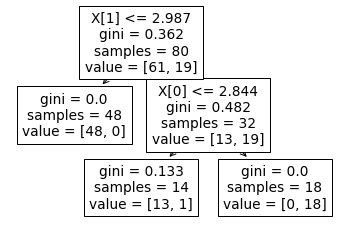

In [150]:
tree.plot_tree(tree_cl)
plt.show()

In [151]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(train_X)

In [152]:
kmeans.labels_

array([0, 2, 4, 4, 3, 4, 0, 3, 3, 1, 4, 1, 0, 2, 1, 1, 2, 0, 0, 1, 0, 4,
       0, 2, 1, 1, 2, 1, 4, 2, 3, 2, 2, 1, 4, 1, 3, 3, 2, 2, 2, 4, 2, 4,
       0, 4, 0, 3, 0, 3, 1, 0, 1, 2, 3, 4, 0, 3, 1, 2, 2, 1, 3, 2, 2, 1,
       4, 2, 4, 4, 4, 2, 4, 0, 4, 2, 2, 1, 4, 4], dtype=int32)

In [153]:
kmeans.cluster_centers_[:,0]

array([1.65135762, 1.59696183, 3.73603108, 0.55431991, 3.88288433])

In [154]:
layout = go.Layout(
        title='Funcion K means',
        autosize=False,
        width=1000,
        height=1000,
        showlegend = True,
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        ),
     xaxis_title="Examen1",
     yaxis_title="Examen2"
)

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=train_X[:,0],
        y=train_X[:,1],
        mode ='markers',
        marker=dict(
        size=20,
        color=kmeans.labels_
    ),
    name='Data')
)
fig.add_trace(
    go.Scatter(
        x=kmeans.cluster_centers_[:,0],
        y=kmeans.cluster_centers_[:,1],
        mode ='markers',
        marker=dict(
        symbol="square",
        size=20,
        color=[0,1,2,4,5]
    ),
    name='Centroides')
)


fig.update_layout(
    layout
)
fig['data'][0]['showlegend']=True
fig['data'][1]['showlegend']=True
fig.show()